<ipython-input-10-b8228793e685>:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Não informado", inplace=True)
<ipython-input-10-b8228793e685>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

📊 Estatísticas Numéricas:
             Idade
count  4696.000000
mean     31.568356
std       6.723254
min      18.000000
25%      27.000000
50%      30.000000
75%      35.000000
max      53.000000

📍 Análise por Estado:
  Estado      Idade     Genero                   Faixa_salarial  \
0     AL  28.851852  Masculino  de R$ 8.001/mês a R$ 12.000/mês   
1     AM  28.920000  Masculino   de R$ 4.001/mês a R$ 6.000/mês   
2     AP  37.500000  Masculino   de R$ 6.001/mês a R$ 8.000/mês   
3     BA  32.284553  Masculino   de R$ 6.001/mês a R$ 8.000/mês   
4     CE  31.545455  Masculino   de R$ 4.001/mês a R$ 6.000/mês   

                                   Uso_IA_Generativa  
0  Utilizo apenas soluções gratuitas (como por ex...  
1  Utilizo apenas soluções gratuitas (como por ex...  
2  Utilizo soluções pagas de AI Generativa (como ...  
3  Utilizo apenas soluções gratuitas (como por ex...  
4  Utilizo apenas soluções gratuitas (como por ex...  

🤖 Uso de IA Generativa:
Uso_IA_Generativa
Util

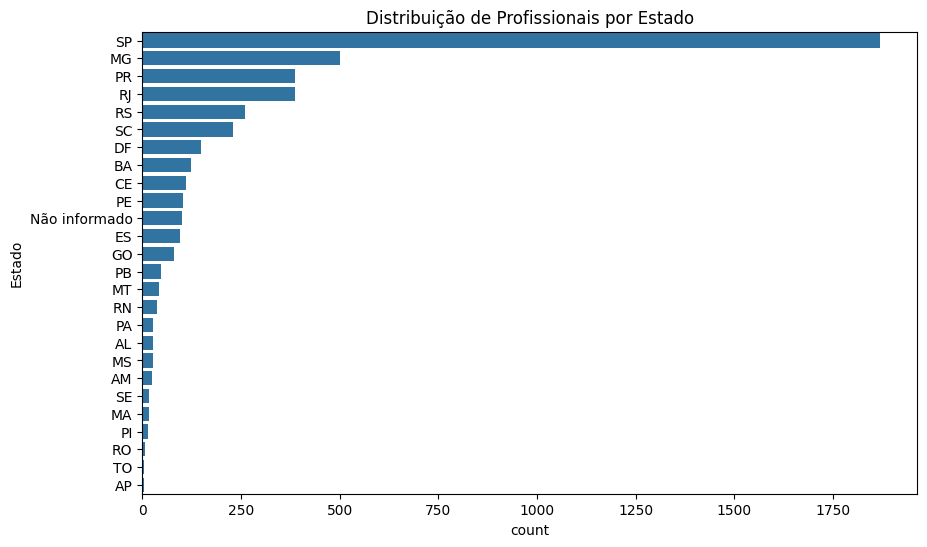

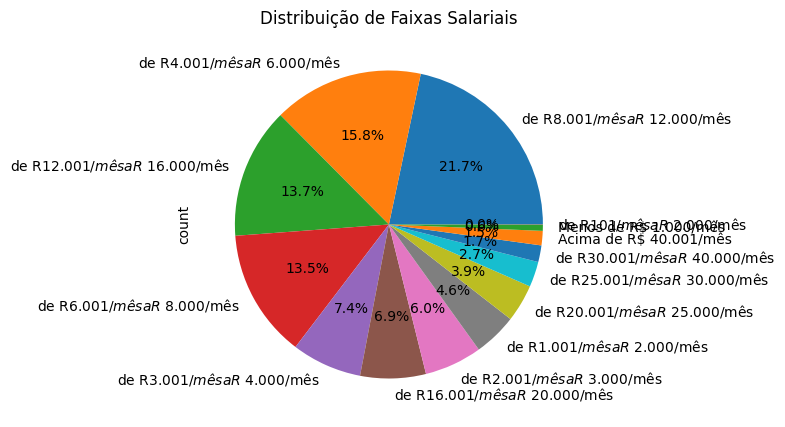


✅ Arquivo 'dados_processados.csv' salvo com sucesso!


In [10]:
# Instalar bibliotecas se necessário
!pip install pandas numpy scipy matplotlib seaborn wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, chi2_contingency
from wordcloud import WordCloud


# ======================================
# 1. CARREGAR E PREPARAR OS DADOS
# ======================================

# Carregar o CSV com renomeação das colunas
df = pd.read_csv("State_of_data_BR_2023_Kaggle - df_survey_2023.csv").rename(columns={
    # 📍 Dados Demográficos
    "('P1_i_1 ', 'uf onde mora')": "Estado",
    "('P1_a ', 'Idade')": "Idade",
    "('P1_b ', 'Genero')": "Genero",
    "('P1_c ', 'Cor/raca/etnia')": "Raca_cor",

    # 1. Satisfação profissional
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')": "Satisfacao_atual",
    "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')": "Fatores_satisfacao",
    "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')": "Motivos_insatisfacao",

    # 2. Fatores de inserção no mercado
    "('P2_g ', 'Nivel')": "Nivel_experiencia",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": "Tempo_experiencia_dados",
    "('P2_h ', 'Faixa salarial')": "Faixa_salarial",
    "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')": "Ferramentas_utilizadas",
    "('P2_f ', 'Cargo Atual')": "Cargo_atual",

    # 3. Acesso à IA Generativa
    "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')": "Uso_IA_Generativa",
    "('P4_l ', 'Qual o tipo de uso de AI Generativa e LLMs na empresa')": "Finalidade_IA_Generativa",
    "('P3_g ', 'Motivos que levam a empresa a não usar AI Genrativa e LLMs')": "Barreiras_IA_Generativa",

    # 4. Dados da Empresa
    "('P2_c ', 'Numero de Funcionarios')": "Tamanho_empresa",
    "('P2_b ', 'Setor')": "Setor_empresa",
    "('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')": "Equipe_dados",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')": "Prioridade_IA"
})

# Selecionar colunas relevantes
colunas_interesse = [
    "Estado", "Idade", "Genero", "Raca_cor",
    "Satisfacao_atual", "Fatores_satisfacao", "Motivos_insatisfacao",
    "Nivel_experiencia", "Tempo_experiencia_dados", "Faixa_salarial",
    "Ferramentas_utilizadas", "Cargo_atual", "Uso_IA_Generativa",
    "Finalidade_IA_Generativa", "Barreiras_IA_Generativa",
    "Tamanho_empresa", "Setor_empresa", "Equipe_dados", "Prioridade_IA"
]

df = df[colunas_interesse]

# ======================================
# 2. LIMPEZA DE DADOS
# ======================================

# Converter idade para numérico
df["Idade"] = pd.to_numeric(df["Idade"], errors='coerce')

# Remover linhas com mais de 50% de dados ausentes
df = df.dropna(thresh=int(len(df.columns)*0.5))

# Preencher valores ausentes
for col in df.select_dtypes(include='object').columns:
    df[col].fillna("Não informado", inplace=True)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Remover outliers apenas em Idade
df = df[(np.abs(zscore(df["Idade"])) < 3)]

# ======================================
# 3. ANÁLISE EXPLORATÓRIA
# ======================================

# Estatísticas básicas
print("📊 Estatísticas Numéricas:")
print(df[["Idade"]].describe())

# Análise por Estado
print("\n📍 Análise por Estado:")
estado_analysis = df.groupby("Estado").agg({
    "Idade": "mean",
    "Genero": lambda x: x.mode()[0] if not x.mode().empty else "Não informado",
    "Faixa_salarial": lambda x: x.mode()[0],
    "Uso_IA_Generativa": lambda x: x.value_counts().index[0]
}).reset_index()

print(estado_analysis.head())

# Análise de IA Generativa
print("\n🤖 Uso de IA Generativa:")
ia_analysis = df["Uso_IA_Generativa"].value_counts(normalize=True) * 100
print(ia_analysis)

# ======================================
# 4. VISUALIZAÇÃO (OPCIONAL)
# ======================================
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Estado", order=df["Estado"].value_counts().index)
plt.title("Distribuição de Profissionais por Estado")
plt.show()

plt.figure(figsize=(8,5))
df["Faixa_salarial"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribuição de Faixas Salariais")
plt.show()
# ======================================
# 5. SALVAR DADOS PROCESSADOS
# ======================================

df.to_csv("dados_processados.csv", index=False, encoding='utf-8-sig')
print("\n✅ Arquivo 'dados_processados.csv' salvo com sucesso!")